<a href="https://colab.research.google.com/github/shiva152001/python-projects/blob/main/EDA_on_Sales_Conversion_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Sales Conversion Optimization**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('/content/KAG_conversion_data.csv', 'r', encoding='latin-1') as f:
    contents = f.read()
df = pd.read_csv('/content/KAG_conversion_data.csv', encoding='latin-1')
df.head(22)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [3]:
df.shape

(1143, 11)

In [4]:
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [8]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
df.drop_duplicates()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [10]:
df.drop_duplicates(inplace=True)
df.shape

(1143, 11)

In [11]:
df.isnull().sum()*100/df.shape[0]

ad_id                  0.0
xyz_campaign_id        0.0
fb_campaign_id         0.0
age                    0.0
gender                 0.0
interest               0.0
Impressions            0.0
Clicks                 0.0
Spent                  0.0
Total_Conversion       0.0
Approved_Conversion    0.0
dtype: float64

In [12]:
any_duplicates = df.duplicated().any()

print(any_duplicates)

False


In [13]:
num_duplicates = df.duplicated().sum()

print(num_duplicates)

0


In [14]:
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [ad_id, xyz_campaign_id, fb_campaign_id, age, gender, interest, Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion]
Index: []


In [15]:
all_occurrences_duplicates = df[df.duplicated(keep=False)]

print(all_occurrences_duplicates)

Empty DataFrame
Columns: [ad_id, xyz_campaign_id, fb_campaign_id, age, gender, interest, Impressions, Clicks, Spent, Total_Conversion, Approved_Conversion]
Index: []


In [16]:
df_no_duplicates = df.drop_duplicates()

print(df_no_duplicates)

        ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.4

In [17]:
df_no_duplicates.shape

(1143, 11)

In [18]:
df_no_duplicates.isnull().sum()*100/df_no_duplicates.shape[0]

ad_id                  0.0
xyz_campaign_id        0.0
fb_campaign_id         0.0
age                    0.0
gender                 0.0
interest               0.0
Impressions            0.0
Clicks                 0.0
Spent                  0.0
Total_Conversion       0.0
Approved_Conversion    0.0
dtype: float64

In [19]:
df['ad_id'].unique()

array([ 708746,  708749,  708771, ..., 1314412, 1314414, 1314415])

In [20]:
df['ad_id'].value_counts()

ad_id
708746     1
1121593    1
1121602    1
1121601    1
1121599    1
          ..
781353     1
781354     1
781438     1
781470     1
1314415    1
Name: count, Length: 1143, dtype: int64

In [21]:
df['ad_id'];df.isnull().sum()*100/df.shape[0]

ad_id                  0.0
xyz_campaign_id        0.0
fb_campaign_id         0.0
age                    0.0
gender                 0.0
interest               0.0
Impressions            0.0
Clicks                 0.0
Spent                  0.0
Total_Conversion       0.0
Approved_Conversion    0.0
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

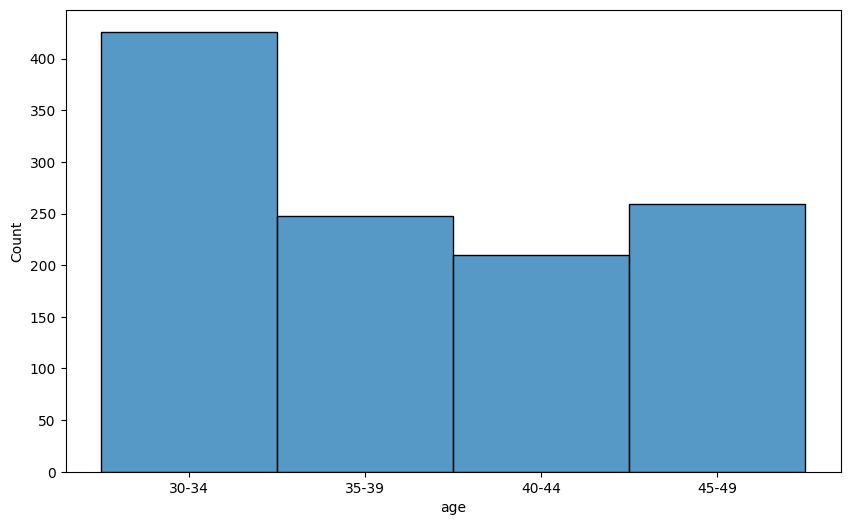

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

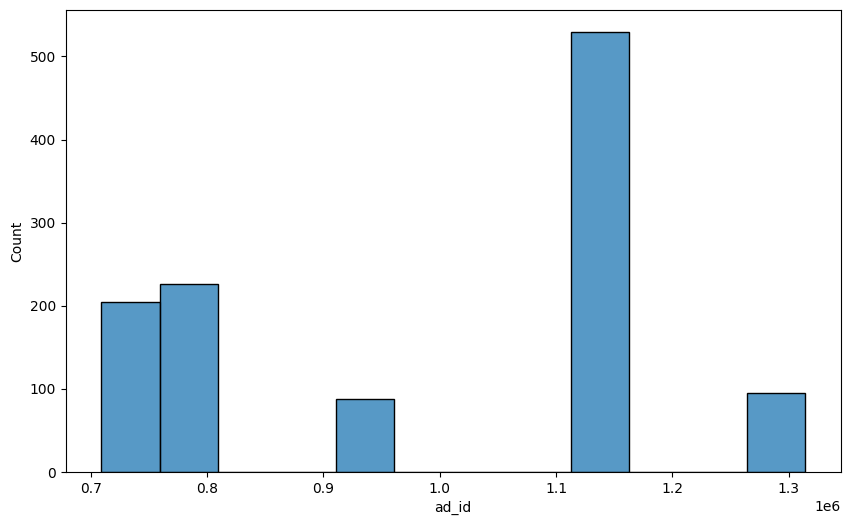

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['ad_id'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

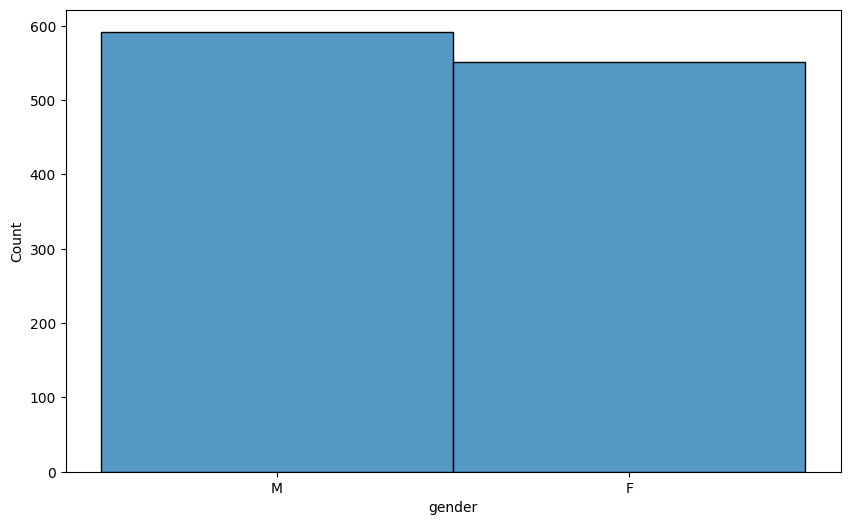

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['gender'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

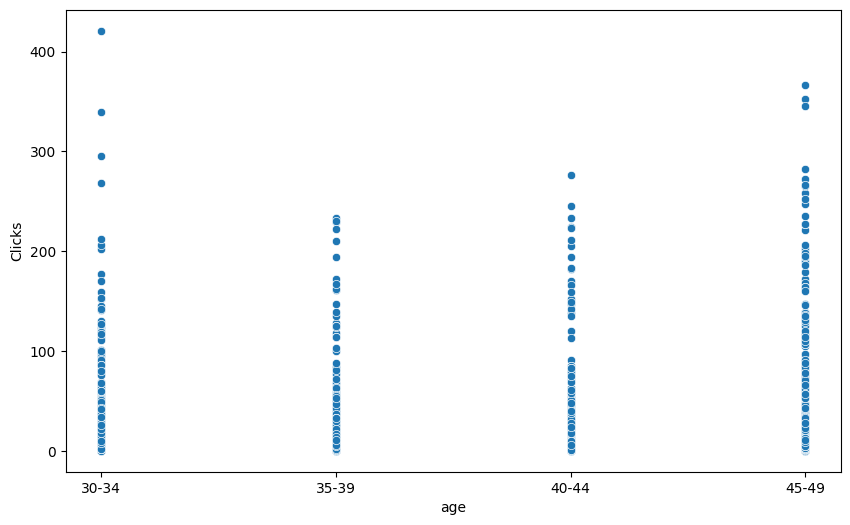

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='Clicks', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

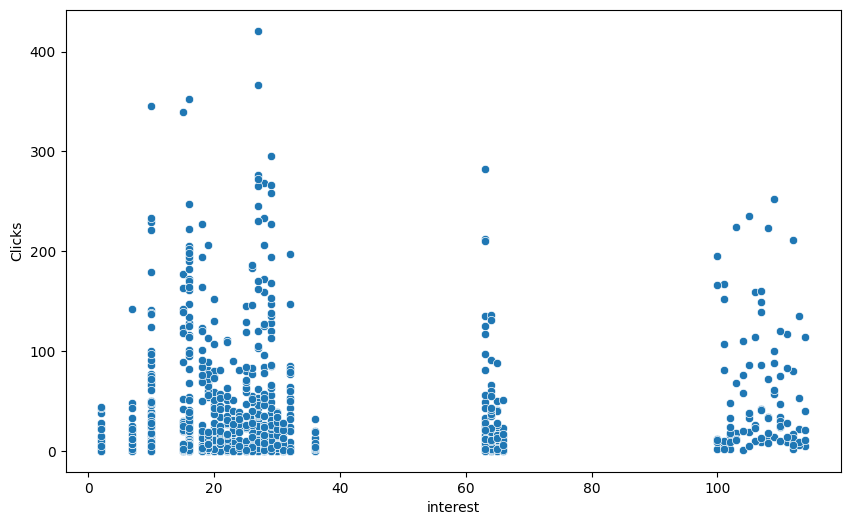

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='interest', y='Clicks', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

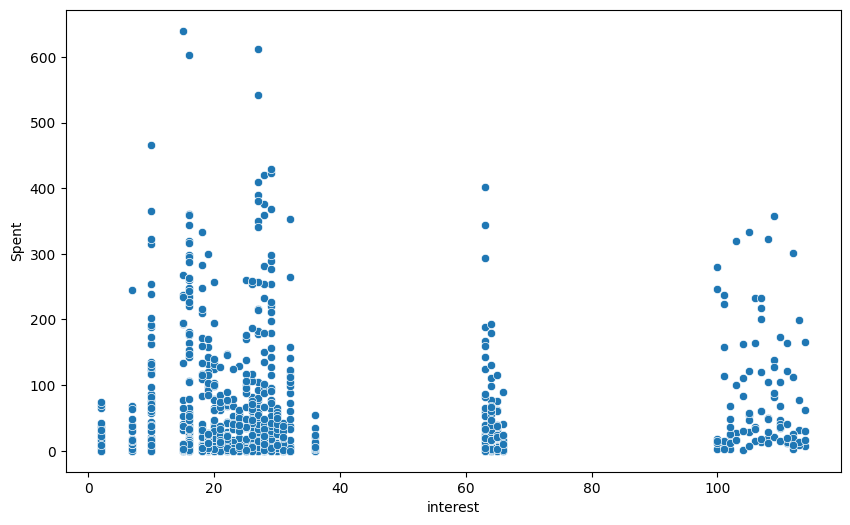

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='interest', y='Spent', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

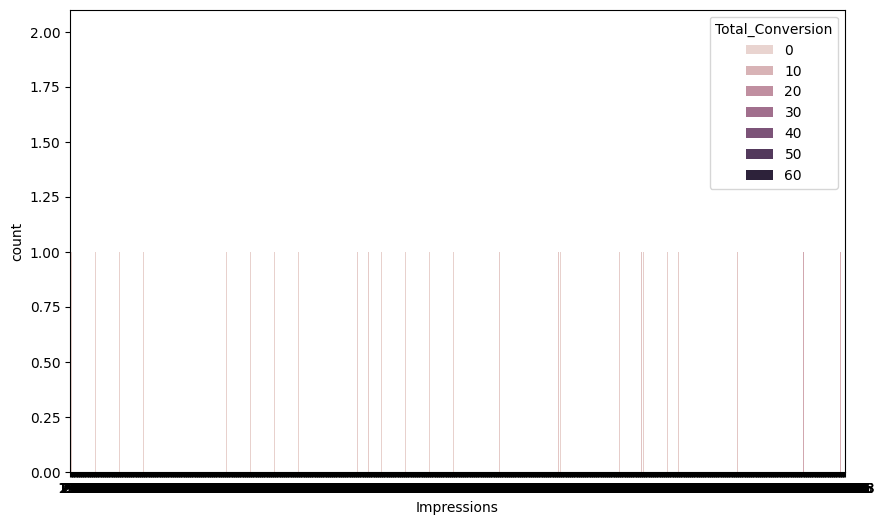

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Impressions', hue='Total_Conversion', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

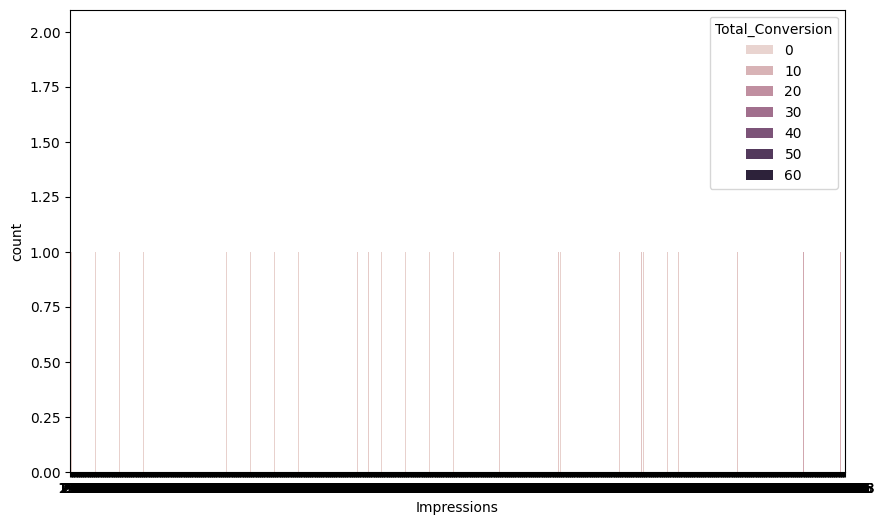

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Impressions', hue='Total_Conversion', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

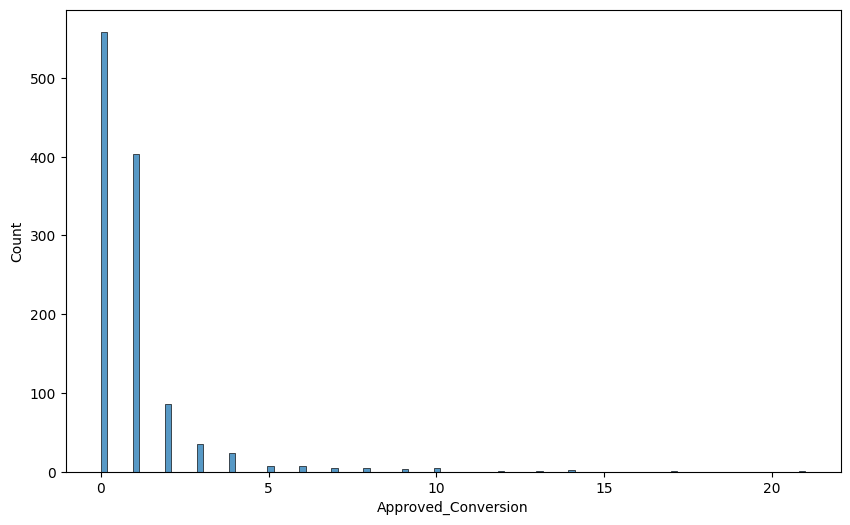

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['Approved_Conversion'])
plt.show